In [1]:
!pip install -q transformers torch pillow matplotlib requests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.2 MB/s eta 0:00:00


In [2]:
from transformers import pipeline
from PIL import Image
import requests
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def visualize_instance_segmentation(image, result):
    try:
        # Получаем маску и информацию из результата
        mask = np.array(result['mask'])
        label = result['label']
        score = result['score']

        # Создаем цветную маску
        colored_mask = np.zeros((mask.shape[0], mask.shape[1], 3), dtype=np.uint8)
        colored_mask[mask > 0] = [255, 0, 0]  # Красный цвет для объекта

        # Визуализация
        plt.figure(figsize=(15, 5))

        # 1. Оригинальное изображение
        plt.subplot(1, 3, 1)
        plt.imshow(image)
        plt.title("Original Image", fontsize=12)
        plt.axis('off')

        # 2. Результат сегментации
        plt.subplot(1, 3, 2)
        plt.imshow(colored_mask)
        plt.title(f"Segmentation Mask\n({label}, confidence: {score:.2f})", fontsize=12)
        plt.axis('off')

        # 3. Наложение маски на изображение
        plt.subplot(1, 3, 3)
        plt.imshow(image)
        plt.imshow(colored_mask, alpha=0.4)  # Полупрозрачная маска
        plt.title("Overlay", fontsize=12)
        plt.axis('off')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Ошибка визуализации: {str(e)}")

In [4]:
# Инициализация модели
try:
    segmentation = pipeline(
        "image-segmentation",
        "facebook/maskformer-swin-base-coco",
        device="cpu"
    )
except Exception as e:
    print(f"Ошибка загрузки модели: {str(e)}")
    raise

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/411M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/usr/local/lib/python3.11/dist-packages/transformers/utils/deprecation.py:172: FutureWarning: `max_size` is deprecated and removed starting from version 4.27.0 for `MaskFormerImageProcessor.__init__`.
  return func(*args, **kwargs)
Device set to use cpu


In [5]:
# Загрузка изображения
try:
    url = "https://i.pinimg.com/736x/43/72/de/4372dee1b1b38a9abf0d10254bcbee50.jpg"
    image = Image.open(requests.get(url, stream=True).raw)
except Exception as e:
    raise

`label_ids_to_fuse` unset. No instance will be fused.



 Объект 1:
Метка: tree-merged
Уверенность: 0.99


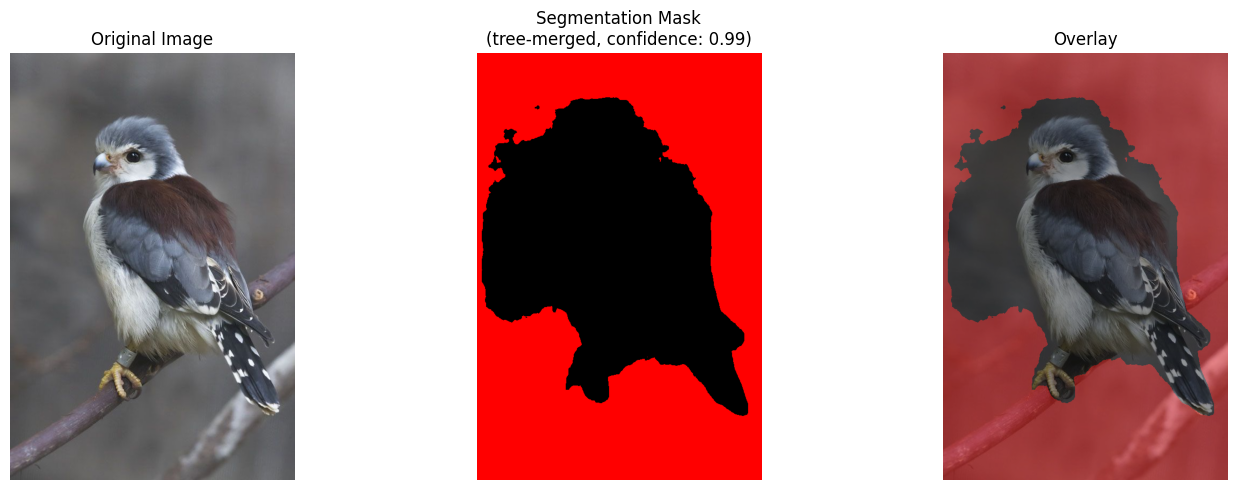


 Объект 2:
Метка: bird
Уверенность: 1.00


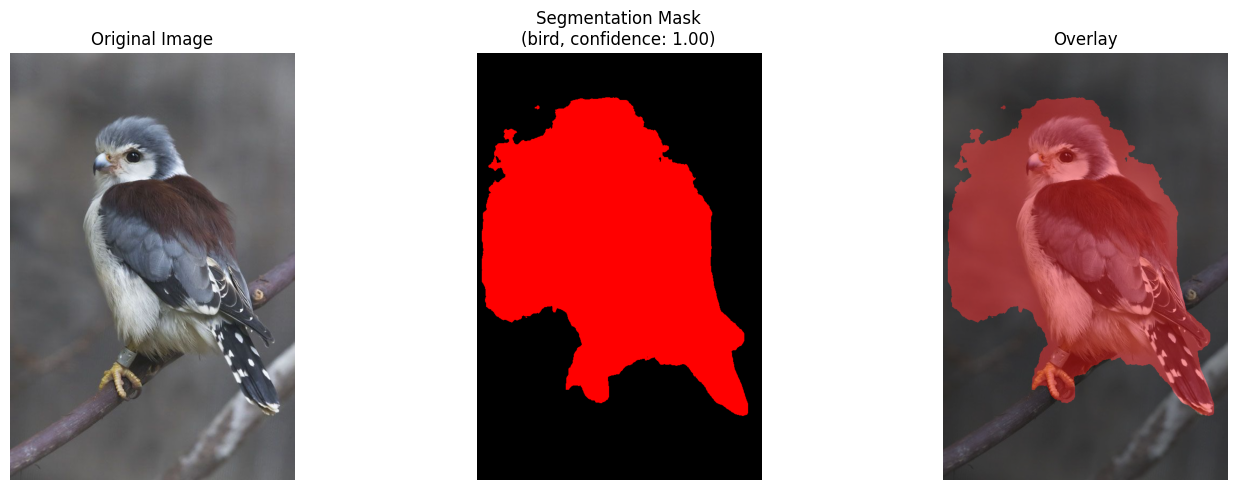

In [6]:
# Cегментация
try:
    results = segmentation(image)

    # Обрабатываем все найденные объекты
    for i, result in enumerate(results):
        print(f"\n Объект {i+1}:")
        print(f"Метка: {result['label']}")
        print(f"Уверенность: {result['score']:.2f}")
        visualize_instance_segmentation(image, result)

except Exception as e:
    print(f"Ошибка сегментации: {str(e)}")
    raise